In [391]:
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
#Reference: geeksforgeeks.com
#https://www.richmondquant.com/news/2021/9/21/shannons-demon-amp-how-portfolio-returns-can-be-created-out-of-thin-air
#TODO: https://www.shufflup.org/volatility.php

In [392]:
asset = "BTC-USD"
start_date = datetime(2016, 1, 1)
end_date = datetime(2023, 5, 5)

In [393]:
# [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
data = yf.download(asset, start = start_date, end = end_date, interval = "1d")


[*********************100%***********************]  1 of 1 completed


In [394]:
data = data["Close"].to_frame()
data = data.reset_index()
data

,Date,Close
0,2016-01-01,434.334015
1,2016-01-02,433.437988
2,2016-01-03,430.010986
3,2016-01-04,433.091003
4,2016-01-05,431.959991
...,...,...
2676,2023-04-30,29268.806641
2677,2023-05-01,28091.568359
2678,2023-05-02,28680.537109
2679,2023-05-03,29006.308594


In [395]:

#Initialize
portfolio = pd.DataFrame(columns=["Date", "Price", "Lot", "Stock", "Cash", "Total"])
portfolio_rebalance = portfolio.copy()
portfolio_unbalance = portfolio.copy()
initial_cap = 1000.0
initial_alloc = {"Date": data["Date"].iloc[0], 
                "Price": data["Close"].iloc[0], 
                "Lot": (initial_cap/2) / data["Close"].iloc[0], 
                "Stock": initial_cap/2, 
                "Cash": initial_cap/2, 
                "Total": initial_cap}
portfolio_rebalance = portfolio_rebalance.append(initial_alloc, ignore_index=True)
portfolio_unbalance = portfolio_unbalance.append(initial_alloc, ignore_index=True)
print(portfolio_rebalance, "\n", portfolio_unbalance)

        Date       Price       Lot  Stock   Cash   Total
0 2016-01-01  434.334015  1.151188  500.0  500.0  1000.0 
         Date       Price       Lot  Stock   Cash   Total
0 2016-01-01  434.334015  1.151188  500.0  500.0  1000.0


In [396]:

for i in range(1, len(data)):
    date = data["Date"].iloc[i]
    price = data["Close"].iloc[i]
    lot = portfolio_rebalance["Lot"].iloc[i-1]
    stock = price * lot
    cash = portfolio_rebalance["Cash"].iloc[i-1]
    total = stock + cash
    price_last = data["Close"].iloc[i-1]



    # rebalance
    if price / price_last > 1.1 or price / price_last < 0.9 :
      print("rebalance", stock, cash, stock / cash)
      total = stock + cash
      lot = (total/2) / price
      stock = lot * price
      cash = total - stock



    temp = {"Date": date,
            "Price": price,
            "Lot": lot,
            "Stock": stock,
            "Cash": cash,
            "Total": total}
    portfolio_rebalance = portfolio_rebalance.append(temp, ignore_index=True)

portfolio_rebalance

rebalance 419.41337905857097 500.0 0.8388267581171419
rebalance 530.2391247441361 459.7066895292855 1.1534292121941319
rebalance 624.313880408242 494.9729071367108 1.261309197749297
rebalance 710.3598496933646 559.6433937724764 1.2693080229267606
rebalance 723.2734647034083 635.0016217329205 1.1390104213113563
rebalance 528.3055682382469 679.1375432181644 0.7779065868377937
rebalance 1169.462567195102 603.7215557282057 1.9370893023432014
rebalance 778.0647274857761 886.592061461654 0.8775904514676598
rebalance 741.0127463112709 832.328394473715 0.8902889186903405
rebalance 678.1621450357248 786.6705703924929 0.8620662454645659
rebalance 917.0476256290543 732.4163577141089 1.252085123400554
rebalance 2252.455659844914 824.7319916715817 2.731136517791187
rebalance 1156.3389522323055 1538.593825758248 0.751555695124696
rebalance 1502.2099994378448 1347.4663889952767 1.1148404232612814
rebalance 1801.5645206714958 1424.8381942165606 1.2643993738966803
rebalance 1862.4355848876714 1613.2013

,Date,Price,Lot,Stock,Cash,Total
0,2016-01-01,434.334015,1.151188,500.000000,500.000000,1000.000000
1,2016-01-02,433.437988,1.151188,498.968505,500.000000,998.968505
2,2016-01-03,430.010986,1.151188,495.023382,500.000000,995.023382
3,2016-01-04,433.091003,1.151188,498.569060,500.000000,998.569060
4,2016-01-05,431.959991,1.151188,497.267053,500.000000,997.267053
...,...,...,...,...,...,...
2676,2023-04-30,29268.806641,0.394809,11555.581670,6943.411691,18498.993361
2677,2023-05-01,28091.568359,0.394809,11090.797667,6943.411691,18034.209358
2678,2023-05-02,28680.537109,0.394809,11323.327698,6943.411691,18266.739388
2679,2023-05-03,29006.308594,0.394809,11451.945138,6943.411691,18395.356829


In [397]:
for i in range(1, len(data)):
    date = data["Date"].iloc[i]
    price = data["Close"].iloc[i]
    lot = portfolio_unbalance["Lot"].iloc[i-1]
    stock = price * portfolio_unbalance["Lot"].iloc[i-1]
    cash = portfolio_unbalance["Cash"].iloc[i-1]
    total = stock + cash
    
    temp = {"Date": date,
            "Price": price,
            "Lot": lot,
            "Stock": stock,
            "Cash": cash,
            "Total": total}
    portfolio_unbalance = portfolio_unbalance.append(temp, ignore_index=True)


portfolio_unbalance

,Date,Price,Lot,Stock,Cash,Total
0,2016-01-01,434.334015,1.151188,500.000000,500.0,1000.000000
1,2016-01-02,433.437988,1.151188,498.968505,500.0,998.968505
2,2016-01-03,430.010986,1.151188,495.023382,500.0,995.023382
3,2016-01-04,433.091003,1.151188,498.569060,500.0,998.569060
4,2016-01-05,431.959991,1.151188,497.267053,500.0,997.267053
...,...,...,...,...,...,...
2676,2023-04-30,29268.806641,1.151188,33693.891840,500.0,34193.891840
2677,2023-05-01,28091.568359,1.151188,32338.669545,500.0,32838.669545
2678,2023-05-02,28680.537109,1.151188,33016.683159,500.0,33516.683159
2679,2023-05-03,29006.308594,1.151188,33391.707303,500.0,33891.707303


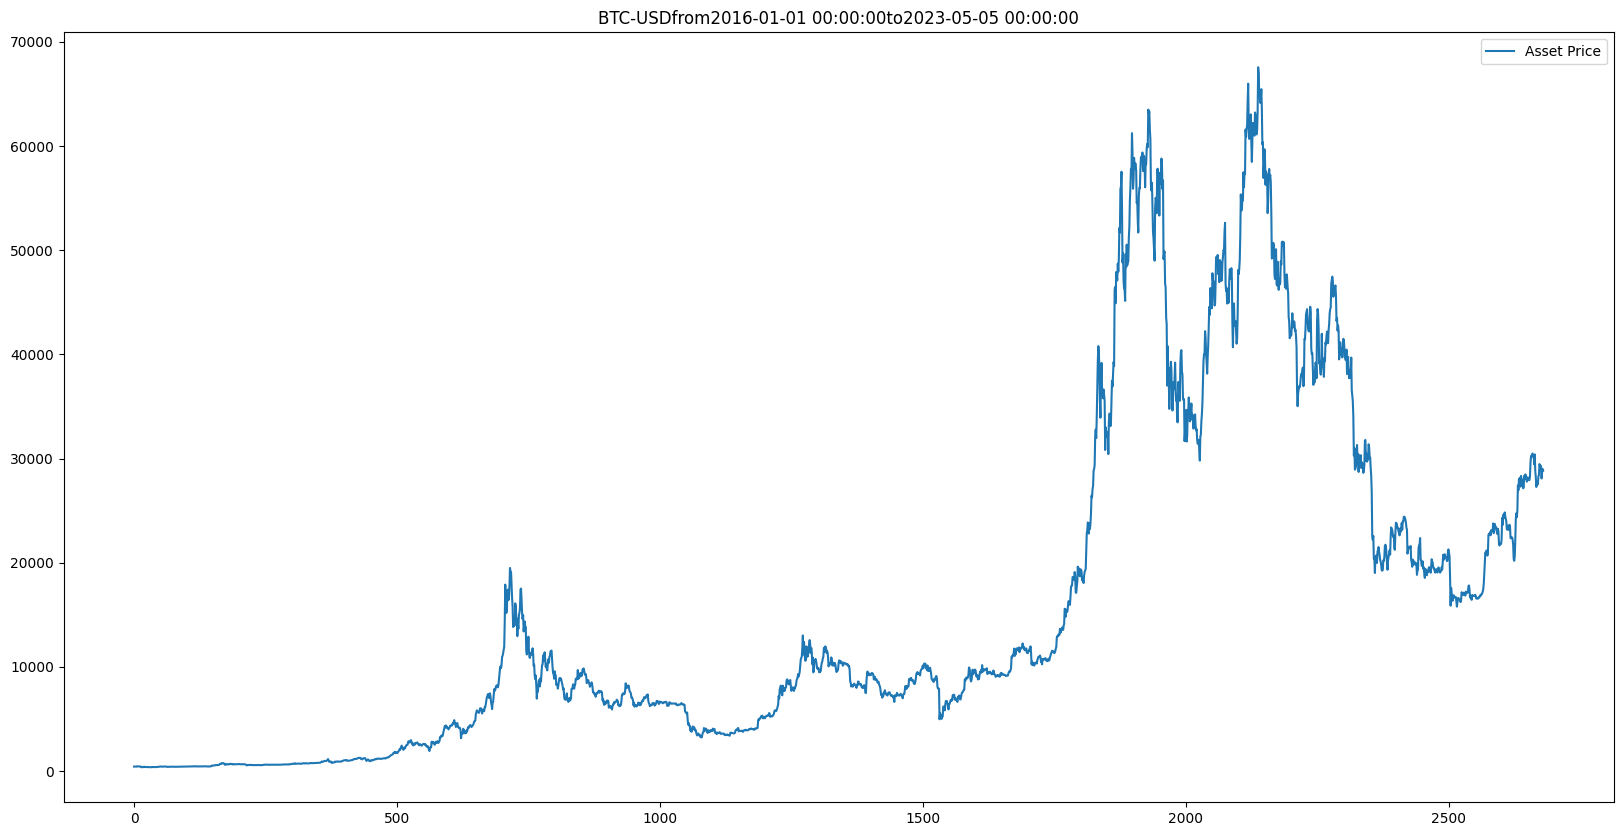

In [398]:
plt.figure(figsize = (20,10))
plt.title(asset + "from" + str(start_date) + "to" + str(end_date))
plt.plot(data['Close'], label = "Asset Price")
plt.legend()
plt.show()

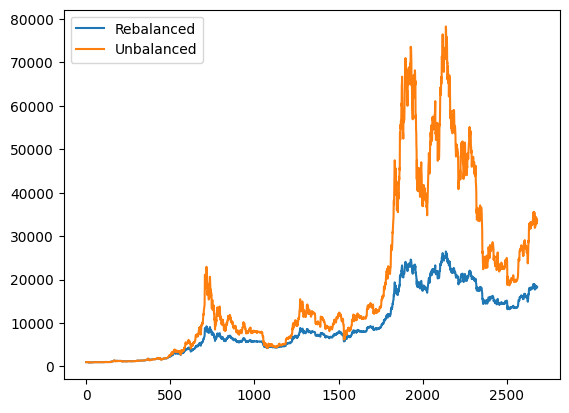

In [399]:
plt.plot(portfolio_rebalance["Total"], label = "Rebalanced")
plt.plot(portfolio_unbalance["Total"], label = "Unbalanced")
plt.legend()
plt.show()